In [9]:
import os
import pandas as pd 
import numpy as np
import seaborn as sns

In [10]:
os.chdir(r"D:\Imarticus\Supervised Learning\Naive Bayes\Mobile Price Range Prediction\Dataset")
df=pd.read_csv("mobile_price.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [12]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [13]:
categorical_col = df.select_dtypes(include=['object']).columns
categorical_col

Index([], dtype='object')

In [14]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<AxesSubplot:>

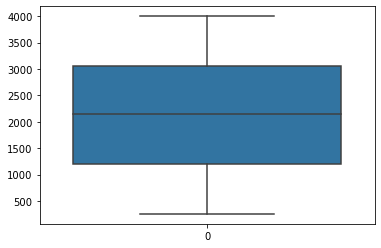

In [15]:
sns.boxplot(data=df["ram"])

<AxesSubplot:>

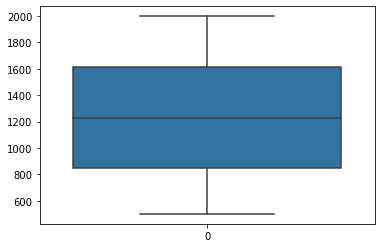

In [16]:
sns.boxplot(data=df["battery_power"])

<AxesSubplot:>

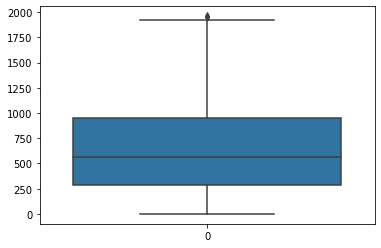

In [17]:
sns.boxplot(data=df["px_height"])

<AxesSubplot:>

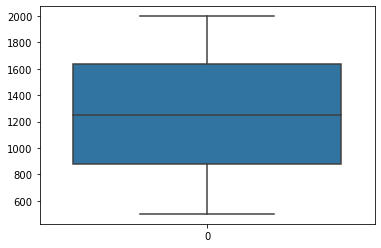

In [18]:
sns.boxplot(data=df["px_width"])

### Select important features using Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [20]:
from sklearn.feature_selection import RFE
rfe=RFE(rf,7)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [21]:
cr_x = df.iloc[: , 0:20]
cr_y = df.iloc[:, -1]

In [22]:
cr_y.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [23]:
rfe.fit(cr_x,cr_y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=7)

In [24]:
rfe.support_

array([ True, False, False, False, False, False,  True, False,  True,
       False, False,  True,  True,  True, False, False,  True, False,
       False, False])

In [25]:
feature_imp_rfe= pd.DataFrame({"Features":cr_x.columns,"Important":rfe.support_ })

In [26]:
feature_imp_rfe.sort_values("Important",ascending=False)

,Features,Important
0,battery_power,True
11,px_height,True
16,talk_time,True
6,int_memory,True
8,mobile_wt,True
13,ram,True
12,px_width,True
18,touch_screen,False
17,three_g,False
15,sc_w,False


In [27]:
df.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [28]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


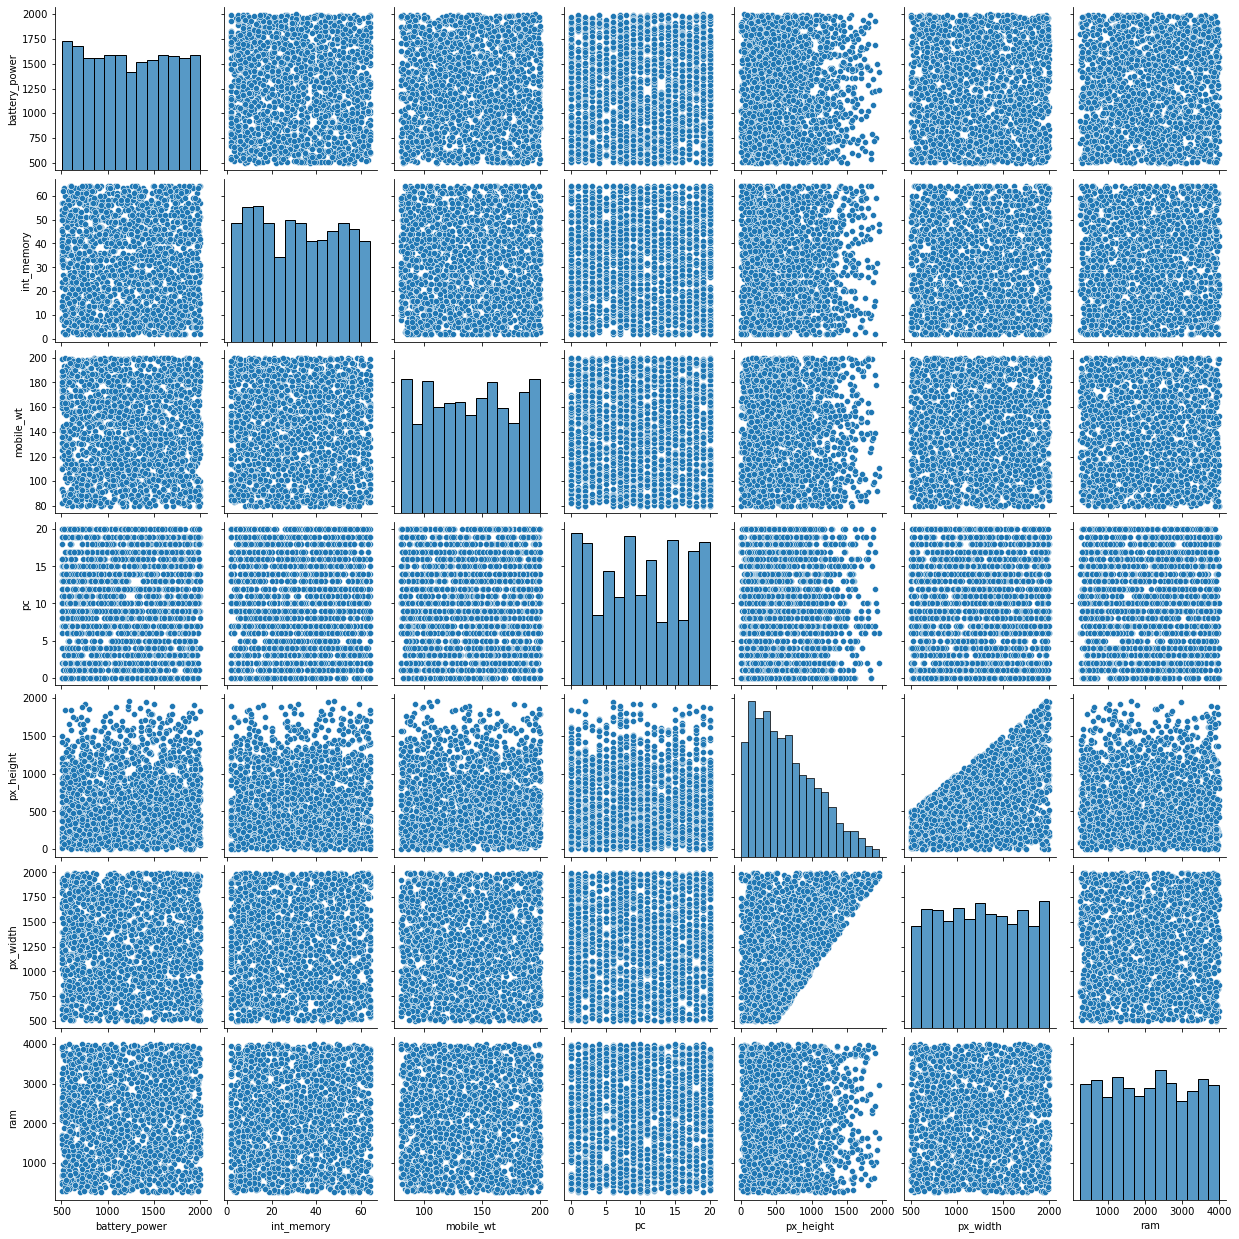

In [29]:

imp_features = ['battery_power','int_memory', 'mobile_wt', 'pc', 'px_height',
       'px_width', 'ram',]
sns.pairplot(df[imp_features],palette='viridis', size=2.5)

[0.06184667 0.0204011  0.03300326 0.01949167 0.03299126 0.01646323
 0.03568417 0.03321986 0.03576508 0.03350636 0.03369546 0.04808781
 0.04952698 0.38969528 0.03528001 0.03394669 0.03540841 0.01390165
 0.0182089  0.01987616]


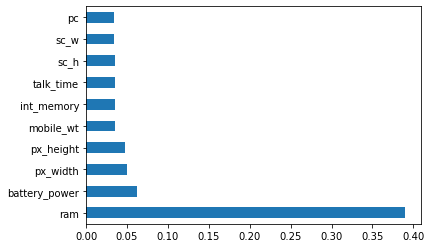

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(cr_x,cr_y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=cr_x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Train Naive Bayes model with data and checking it’s performance

In [31]:
from sklearn.model_selection import train_test_split
x=df.drop(['price_range'],axis=1)
y=df['price_range']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=100)

In [32]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((1400, 20), (600, 20), (1400,), (600,))

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn=KNeighborsClassifier(n_neighbors=20)

In [35]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [36]:
y_pred1=knn.predict(x_test)
y_pred1

array([0, 1, 1, 2, 2, 3, 3, 2, 3, 0, 0, 2, 3, 3, 0, 2, 2, 3, 2, 0, 0, 3,
       1, 0, 0, 1, 3, 0, 2, 2, 0, 3, 0, 1, 0, 2, 3, 2, 1, 3, 3, 3, 0, 0,
       3, 3, 2, 0, 1, 2, 3, 2, 3, 1, 1, 3, 1, 3, 1, 0, 2, 2, 3, 0, 2, 0,
       0, 3, 3, 2, 0, 1, 2, 0, 2, 3, 0, 3, 2, 3, 1, 0, 3, 0, 2, 2, 1, 2,
       3, 3, 3, 3, 3, 2, 0, 2, 3, 1, 1, 1, 0, 0, 2, 3, 2, 0, 0, 1, 0, 1,
       0, 1, 3, 2, 0, 3, 1, 3, 0, 1, 3, 1, 0, 1, 3, 2, 3, 2, 0, 3, 1, 0,
       1, 2, 3, 1, 3, 2, 0, 1, 3, 1, 2, 3, 1, 2, 2, 2, 0, 1, 0, 3, 1, 1,
       1, 0, 2, 3, 1, 1, 3, 3, 3, 0, 0, 3, 0, 3, 3, 0, 3, 0, 2, 1, 1, 2,
       2, 1, 3, 1, 0, 2, 1, 0, 0, 3, 2, 2, 3, 2, 2, 1, 2, 1, 2, 2, 3, 1,
       1, 1, 3, 1, 2, 1, 3, 0, 1, 3, 3, 2, 0, 1, 2, 0, 1, 2, 3, 0, 1, 3,
       0, 3, 0, 0, 1, 2, 2, 3, 2, 0, 2, 2, 0, 1, 1, 3, 2, 3, 2, 0, 1, 3,
       1, 1, 0, 2, 2, 1, 1, 1, 1, 2, 3, 1, 3, 2, 2, 1, 1, 3, 1, 3, 2, 2,
       2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 1, 1, 3, 2, 1, 2, 1, 3, 1, 0, 2,
       3, 0, 0, 1, 3, 2, 1, 2, 3, 0, 2, 3, 0, 3, 3,

In [38]:
from sklearn.metrics import confusion_matrix
tab=confusion_matrix(y_test,y_pred1)
tab

array([[155,   4,   0,   0],
       [  7, 133,   6,   0],
       [  0,  14, 126,   7],
       [  0,   0,  13, 135]], dtype=int64)

In [57]:
tab.diagonal().sum()*100/tab.sum() # It tells us the accuracy of the Model

91.5

In [40]:
acc_list=[]
for k in range(1,50):
    knn=KNeighborsClassifier(n_neighbors= k)
    knn.fit(x_train,y_train)
    pred2=knn.predict(x_test)
    tab=confusion_matrix(pred2,y_test)
    acc=tab.diagonal().sum() * 100/tab.sum()
    acc_list.append(acc)

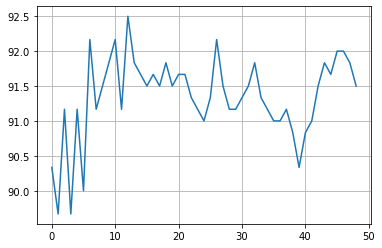

In [41]:
import matplotlib.pyplot as plt
plt.plot(acc_list)
plt.grid()

Minimum error:- 89.66666666666667 at K = 2


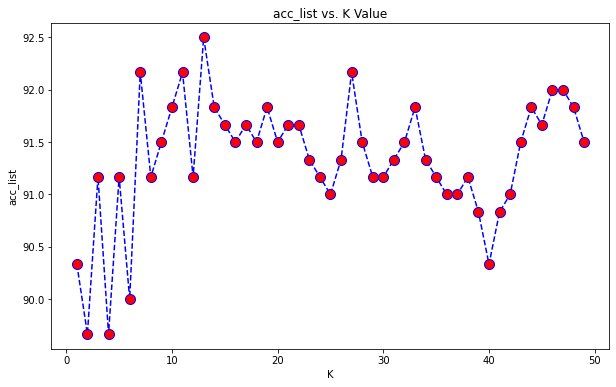

In [56]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc_list,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('acc_list vs. K Value')
plt.xlabel('K')
plt.ylabel('acc_list')
req_k_value = acc_list.index(min(acc_list))+1
print("Minimum error:-",min(acc_list),"at K =",req_k_value)

In [46]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix ,accuracy_score 
print("KNN - 10 neighbors Accuracy score and Confusion matrix")
print(accuracy_score(y_pred1,y_test))
print(confusion_matrix(y_test, y_pred1))
print("-------------------------")

KNN - 10 neighbors Accuracy score and Confusion matrix
0.915
[[155   4   0   0]
 [  7 133   6   0]
 [  0  14 126   7]
 [  0   0  13 135]]
-------------------------


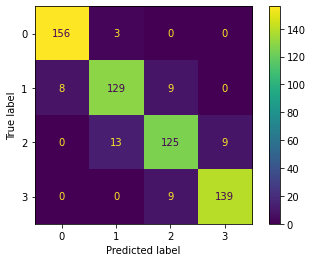

In [51]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, x_test, y_test)
plt.show()